# Project 2 (tmdb-movies.csv) by Bariq H
## Why this dataset?
## Film industry has existed since a long time ago. The data that we have for each movie is extremely tremendous. Data analyst could use this to give insights for show-directors in order to make a new movie such as a movie based on people's desire for specific genre and how to succeed on making a high revenue movies.

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the CSV file from directory
df = pd.read_csv('tmdb-movies.csv')

In [3]:
len(df)

10866

### The total of movies we have on the data set is 10.866 movies

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### The columns we have here is 'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date',    'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'

In [5]:
#Showing columns that contain NaN values
df.columns[df.isna().any()].tolist()

['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

### We have to eliminate missing genres value since we're going to use it in further explorations

In [6]:
#Dropping missing values in Genre
df.dropna(subset = ["genres"], inplace=True)

In [7]:
#Final check for genres column
df.columns[df.isna().any()].tolist()

['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'production_companies']

In [8]:
df['release_year'].max()

2015

### The latest movie we have here is movie in 2015

In [9]:
df['release_year'].min()

1960

### and the oldest movie we have here is movie in 1960

In [10]:
#Making new dummy df, dropping unneccesary columns for correlation matrix
corr_df = df.drop(columns=['id','original_title','cast','homepage','director','tagline','keywords','overview','genres','production_companies','release_date','imdb_id'])

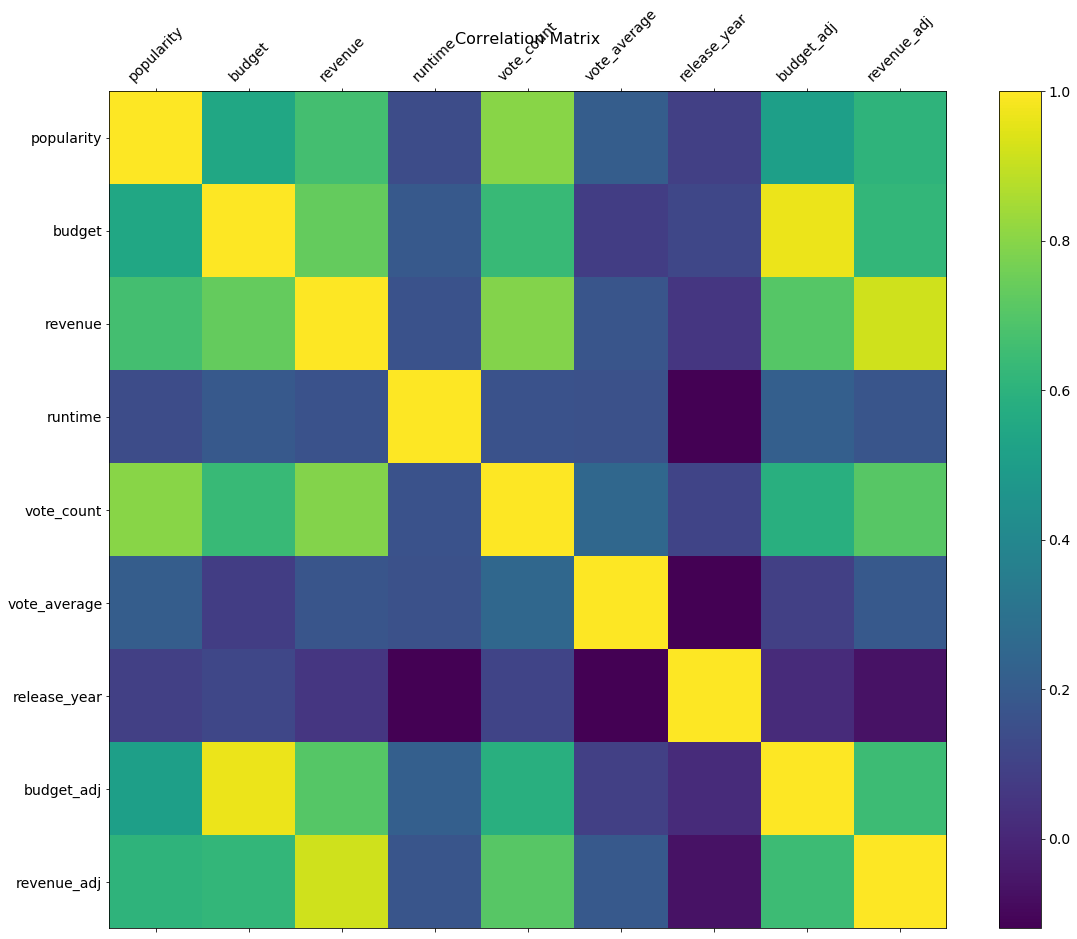

In [11]:
#Correlation Matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### As you can, there's a huge correlation between budget and revenue. And also, there's a high correlation between vote_count and revenue. There's a mid correlation between popularity and budget. Also, there's a close to none correlation between revenue_adj, vote_average, and runtime with release_year. 

In [12]:
df.plot.scatter(x='budget',y='revenue', c='red')
plt.title('budget vs revenue scatter plot')

Text(0.5, 1.0, 'budget vs revenue scatter plot')

### Based on the graph, we could say that there's a strong correlation of the budget for the movie and the revenue for the movie. We could maybe use linear regression to predict future movies based on its budget

In [13]:
df.plot.scatter(x='release_year',y='popularity', c='DarkBlue')
plt.title('release_year vs popularity scatter plot')

Text(0.5, 1.0, 'release_year vs popularity scatter plot')

### This shows that there's a correlation of time and popularity of a movie. We could say that people nowadays love to see movies because there's an advancement of technology, movie is also easily accessible through streaming website

# ASKING QUESTIONS
## 1. Which genres are most popular from year to year? What insights can we draw and give to show-directors?
## 2. What kinds of properties are associated with movies that have high revenues?

# DATA PREPROCESSING OR DATA WRANGLING

In [14]:
#Checking the value in the dataframe, also can look at each column and what do they actually consist 
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.  ...   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

In [15]:
#Trying to see if there's any NaN value in one of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
id                      10843 non-null int64
imdb_id                 10835 non-null object
popularity              10843 non-null float64
budget                  10843 non-null int64
revenue                 10843 non-null int64
original_title          10843 non-null object
cast                    10768 non-null object
homepage                2931 non-null object
director                10801 non-null object
tagline                 8037 non-null object
keywords                9368 non-null object
overview                10840 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
release_date            10843 non-null object
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj              1

In [16]:
#Changing the release_date column type of Object to Datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [17]:
#It changed, now it is datetime64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
id                      10843 non-null int64
imdb_id                 10835 non-null object
popularity              10843 non-null float64
budget                  10843 non-null int64
revenue                 10843 non-null int64
original_title          10843 non-null object
cast                    10768 non-null object
homepage                2931 non-null object
director                10801 non-null object
tagline                 8037 non-null object
keywords                9368 non-null object
overview                10840 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
release_date            10843 non-null datetime64[ns]
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj       

In [18]:
#Checking the duplicate data
df.duplicated().sum()

1

In [19]:
#Printing the total rows of DF
len(df)

10843

In [20]:
#Dropping the duplicates and inplace the original variable
df.drop_duplicates(inplace=True)

In [21]:
#Confirmed, the duplicate is dropped
len(df)

10842

# QUESTION:
## Which genres are most popular from year to year?

In [22]:
# Not needed since the df already have this parameter
# df['release_year'] = df['release_date'].dt.year

In [23]:
#Make the dummy encode from the genres by delimiter of '|'
genreList = df['genres'].str.get_dummies('|')
#Adding the column to the data and make a new variable in order not to change the original data
dummy_df = pd.concat([df,genreList],axis=1)

In [24]:
#Seeing if the dummy_data is properly concatenated
dummy_df.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

  History Horror  Music Mystery Romance Science Fiction  TV Movie  Thriller  \
0       0      0      0       0       0               1         0         1   

   War  Western  
0    0        0  

[1 rows x 41 columns]

In [25]:
#List of genres available
allGenre = list(genreList.columns.unique())
#Declaring function to get the best genre from dataframe input
def getGenre(df):
    max = 0
    for genre in allGenre:
        if df[str(genre)].sum()>max:
            best = genre
            max = df[str(genre)].sum()
    return best

In [26]:
#Grouping the df by the release_year
genre_year = dummy_df.groupby(['release_year'])
#Looping through the grouping declared earlier
for year, group in genre_year:
    print(year,getGenre(group))

1960 Drama
1961 Drama
1962 Drama
1963 Comedy
1964 Drama
1965 Drama
1966 Comedy
1967 Comedy
1968 Drama
1969 Drama
1970 Drama
1971 Drama
1972 Drama
1973 Drama
1974 Drama
1975 Drama
1976 Drama
1977 Drama
1978 Drama
1979 Drama
1980 Drama
1981 Drama
1982 Drama
1983 Drama
1984 Drama
1985 Comedy
1986 Drama
1987 Comedy
1988 Comedy
1989 Comedy
1990 Drama
1991 Drama
1992 Drama
1993 Drama
1994 Comedy
1995 Drama
1996 Drama
1997 Drama
1998 Drama
1999 Drama
2000 Drama
2001 Comedy
2002 Drama
2003 Comedy
2004 Drama
2005 Drama
2006 Drama
2007 Drama
2008 Drama
2009 Drama
2010 Drama
2011 Drama
2012 Drama
2013 Drama
2014 Drama
2015 Drama


In [27]:
# Old Code for Searching for Most Popular Genre

# dic_year = {}
# for i in df['release_year'].unique():
#     dic_genre = {}
#     for mov in df[df['release_year']==i]['genres']:
#         try:
#             li = mov.split("|")
#         except:
#             li = [mov]
#         for genre in li:
#             if genre not in dic_genre.keys():
#                 dic_genre[str(genre)] = 1
#             else:
#                 dic_genre[str(genre)]+=1
#     if i not in dic_year.keys():
#         dic_year[str(i)] = dic_genre

# dic_year['2015']

# best_genre = {}
# for i in df['release_year'].unique():
#     max_genre = 0
#     for genre,val in list(dic_year[str(i)].items()):
# #         print(i,genre,val)
#         if int(val)>max_genre:
#             max_genre = int(val)
#             temp = genre     
# #             print(i,temp,val)
#     best_genre[str(i)] = temp

# for year,genre in best_genre.items():
#     print(year,genre)

# CONCLUSION:
## Finally we get our result, this genres is most popular from year to year. We see that the best genre year to year is circulated on Drama or Comedy. This pattern does not change with the course of time based on the data. Hence, based on this result, show-directors could try their luck on Drama or Comedy genre because people like them much more.
# LIMITATION: 
## From this dataset, I would say that I am satisfied with the data that has been provided since there's only some missing values from movies. I think the provider of the data really paid attention to the genre column. Hence, I can say that this data is sufficient with this conclusion.

# QUESTION 2:
## What kinds of properties are associated with movies that have high revenues?
#### Because of inflation over time, we will use rev_adj

### HANDLING VALUES OF 0 AND MISSING VALUES

In [28]:
#Check missing values
df['revenue_adj'].isna().sum()

0

In [29]:
#Assessing the variance of the revenue_adj
df['revenue_adj'].var()

2.095902105946105e+16

In [30]:
#Since variance is large, imputting the 0 value of revenue_adj should be with Median
df['revenue_adj'].median()

0.0

In [31]:
#Checking the total movies with 0 revenue
len(df[df['revenue_adj']==0])

5993

In [32]:
#Checking total of movies in data
len(df)

10842

In [33]:
#However, we see that MOST of the data is 0. What I think is that this section of the data is not properly inputted
#hence the bad quality of the revenue.

#We could try imputing by Mean, the risk here is that it increases variance and might drawn us off from the actual fact.
df['revenue_adj'] = df['revenue_adj'].replace(to_replace = 0, value =df['revenue_adj'].mean()) 

In [34]:
#Checking the previos code is true or not
len(df[(df['revenue_adj'] == 0)])

0

In [35]:
#Segmenting data to high rev and low rev based on mean
high_rev = df[df['revenue_adj'] >= np.mean(df['revenue_adj'])]
low_rev = df[df['revenue_adj'] < np.mean(df['revenue_adj'])]

Text(0.5, 1.0, 'Budget_Adj for High Revenue Histogram')

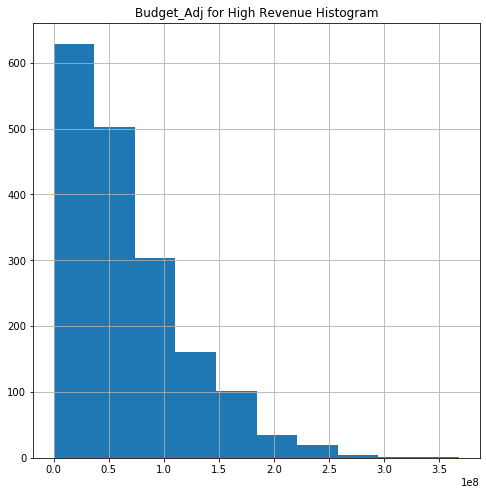

In [36]:
#Histogram of High Revenue
high_rev['budget_adj'].hist(figsize=(8,8))
plt.title('Budget_Adj for High Revenue Histogram')

Text(0.5, 1.0, 'Budget_Adj for Low Revenue Histogram')

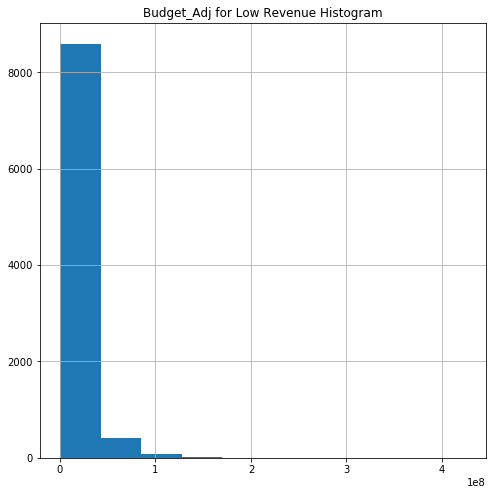

In [37]:
#Histogram of Low Revenue
low_rev['budget_adj'].hist(figsize=(8,8))
plt.title('Budget_Adj for Low Revenue Histogram')

Text(0.5, 1.0, 'Runtime for High Revenue Boxplot')

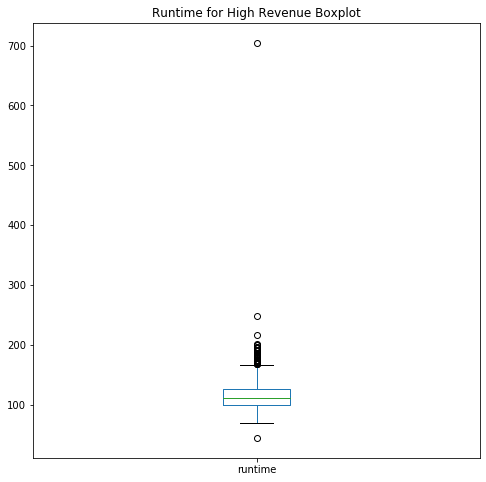

In [38]:
#Box Plot of High Revenue
high_rev['runtime'].plot(kind='box',figsize=(8,8))
plt.title('Runtime for High Revenue Boxplot')

In [39]:
#Box Plot of High Revenue
low_rev['runtime'].plot(kind='box',figsize=(8,8))
plt.title('Runtime for Low Revenue Boxplot')

Text(0.5, 1.0, 'Runtime for Low Revenue Boxplot')

In [40]:
#Violin Plot of High Revenue
ax = plt.subplot(111)
plt.violinplot(high_rev['vote_average'])
plt.title('Vote_average for High Revenue Violinplot')
plt.show()

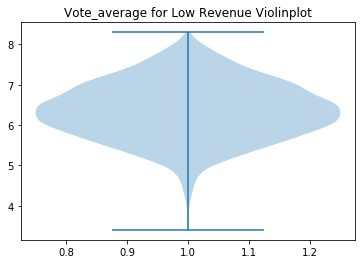

In [41]:
#Violin Plot of High Revenue
ax = plt.subplot(111)
plt.violinplot(high_rev['vote_average'])
plt.title('Vote_average for Low Revenue Violinplot')
plt.show()

# CONCLUSION:
## Based on the result previously, movies with high revenue is movies with high budget also. We could also say that movies with high revenue typically have a longer time than low revenue, it is in average 100 mins. Lastly, high revenue movie is slightly higher on its vote average than low revenue. However, this doesn't take into account the number of voters.
# LIMITATION: 
## However, this result may not entirely be true since there's a lot of 0 revenue movies in the data. The method to process those data will surely affect the result of this conclusion. Still, viewers can interpret this findings to their own knowledge.